In [240]:
import pandas as pd 
#!pip3 install pandas
import numpy as np
import math
from sklearn import linear_model

In [241]:

file1 = pd.read_csv('csv_files/marketing_customer_analysis.csv')
display(file1.head(50))
display(file1.tail())
file1.shape

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
7,7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN
8,8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
9,9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,NaN


,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A
10909,10909,IV32877,NaN,6857.519928,NaN,Basic,Bachelor,1/8/11,Unemployed,M,...,0.0,3,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,NaN


(10910, 26)

In [242]:
cols = []
for column in file1.columns:
    cols.append(column.lower())
cols
file1.columns = cols

file1.columns

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')

In [243]:
file1 = file1.rename(columns={'employmentstatus':'employment status'})
file1.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [244]:
# Which columns are numerical
file1._get_numeric_data()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [245]:
file1.columns=file1.columns.str.replace(' ', '_')
file1.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [246]:
#remove unnamed column
file1 = file1.drop('unnamed:_0', axis=1)
file1.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [247]:
#Categorical data
file1.select_dtypes('object')

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [248]:
#Deal with Nan values
#fill NaN values
file1['vehicle_type']= file1['vehicle_type'].fillna('M')
file1['vehicle_type'].value_counts(dropna=False)



M    5482
A    5428
Name: vehicle_type, dtype: int64

In [249]:
#Deal with Nan values
file1.isnull().sum()


customer                           0
state                            631
customer_lifetime_value            0
response                         631
coverage                           0
education                          0
effective_to_date                  0
employment_status                  0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim          633
months_since_policy_inception      0
number_of_open_complaints        633
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                    622
vehicle_size                     622
vehicle_type                       0
dtype: int64

In [250]:
#drop rows that have NaN/None values
file1= file1.dropna()
file1.isna().sum()
                     

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [251]:
#create a column with datetime.First in datetime format
    

In [252]:
file1["effective_to_date"] = pd.to_datetime(file1['effective_to_date'], errors ='coerce')
file1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M


In [253]:
file1.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [254]:
#Extract months from the dataset
#file1['month'] = pd.DatetimeIndex(file1['effective_to_date']).month
file1['month']= file1['effective_to_date'].dt.month
file1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2


In [255]:
#Filter data

In [256]:
file1[(file1['month']==1) | (file1['month']==2) | (file1['month']==3)]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2


In [257]:
file1.reset_index(inplace=True)
file1

,index,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
9130,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
9131,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
9132,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2


In [258]:
# BOUNS create a function to store data transformations

In [259]:
file1 = pd.read_csv('csv_files/marketing_customer_analysis.csv')
file1

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [260]:
def clean_data(df):
    
    #standardize header names
    df.columns=[e.lower().replace(' ', '_') for e in df.columns] 
    
    #drop columns
    df=df.drop(columns=['unnamed:_0']) 
    
    #fill NaN values
    df['vehicle_type']=df['vehicle_type'].fillna('M')
    
    #change dtypes of date to datetime and create new column 'month'
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df['month'] = df['effective_to_date'].dt.month
    
    #drop the other NaN values 
    df=df.dropna()
    return df

file2 = clean_data(file1)
file2


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2


In [261]:
file2.reset_index(inplace=True)
file2

,index,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
9130,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
9131,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
9132,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2


In [262]:
#CUSTOMER ANALYSIS ROUND 3

In [263]:
#DataFrame Info
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          9134 non-null   int64         
 1   customer                       9134 non-null   object        
 2   state                          9134 non-null   object        
 3   customer_lifetime_value        9134 non-null   float64       
 4   response                       9134 non-null   object        
 5   coverage                       9134 non-null   object        
 6   education                      9134 non-null   object        
 7   effective_to_date              9134 non-null   datetime64[ns]
 8   employmentstatus               9134 non-null   object        
 9   gender                         9134 non-null   object        
 10  income                         9134 non-null   int64         
 11  location_code    

In [264]:
#dataFrame description
file2.describe().T

,count,mean,std,min,25%,50%,75%,max
index,9134.0,5490.357675,3148.183236,0.000000,2764.250000,5508.500000,8218.750000,10908.000000
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


In [265]:
#SHOW A PLOT OF TOTAL NUMBER OF RESPONSES

In [266]:
#!pip3 install seaborn if you need to
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

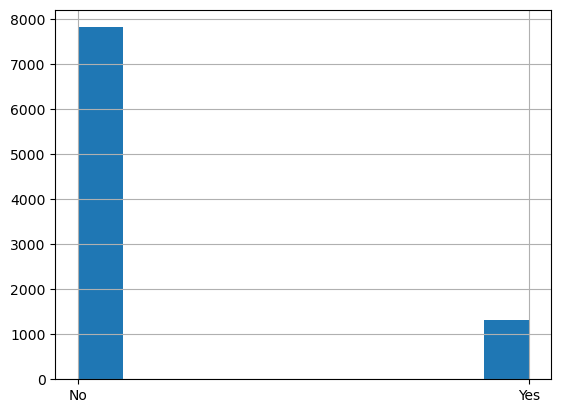

In [267]:
file2['response'].hist(bins=10)
plt.show()

In [268]:
#Total of Responses Rate By Sales Channel

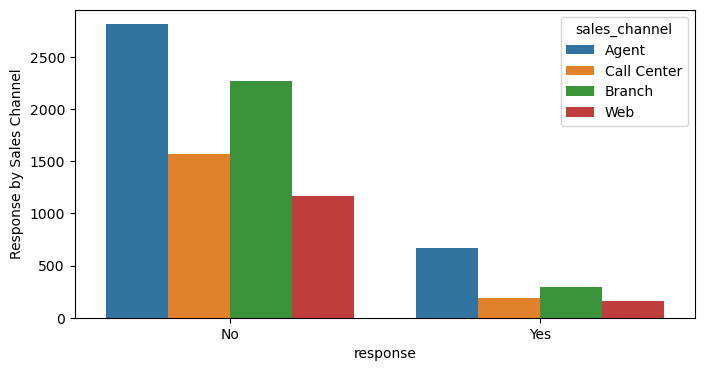

In [269]:
plt.figure(figsize=(8,4))
#sns.countplot(x='sales_channel', hue='response', data=file2)
sns.countplot(x='response', hue='sales_channel', data =file2)
plt.ylabel('Response by Sales Channel') 
plt.show()

In [270]:
# Responses Rate By sales Channel

file2['response_rate']= file2['response'].map({'Yes': 1, 'No': 0}) 
file2
file2.response_rate.value_counts()

0    7826
1    1308
Name: response_rate, dtype: int64

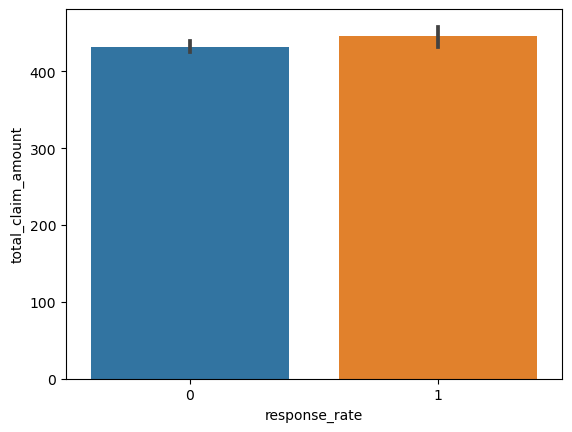

In [271]:
# Responses Rate By total Amount Claim
sns.barplot(x='response_rate', y= 'total_claim_amount', data = file2)
plt.show()

In [272]:
#Show a plot of the response rate by income.


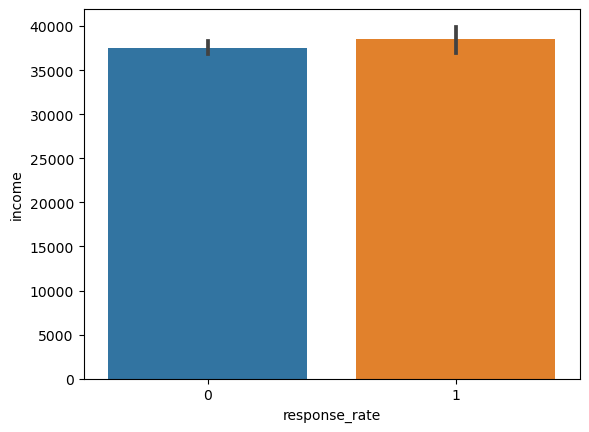

In [273]:
sns.barplot(x='response_rate',y= 'income', data= file2)
plt.show()

In [274]:
#LAB ROUND 4

In [275]:
#Check the data types of the columns

In [276]:
file1 = pd.read_csv('csv_files/marketing_customer_analysis.csv')
display(file1.head(50))
display(file1.tail())
file1.shape

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
7,7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN
8,8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
9,9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,NaN


,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A
10909,10909,IV32877,NaN,6857.519928,NaN,Basic,Bachelor,1/8/11,Unemployed,M,...,0.0,3,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,NaN


(10910, 26)

In [277]:
file1.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [278]:
#Get the numeric data into dataframe called numerical 
file2.dtypes

index                                     int64
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                        

In [279]:
# catgoricals
categoricals=file2.select_dtypes(include=[np.object])
categoricals

C:\Users\Clement\AppData\Local\Temp\ipykernel_13100\855912242.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals=file2.select_dtypes(include=[np.object])


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
9130,QI63521,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
9131,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
9132,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,M


In [280]:
#numerical
numerical = file2.select_dtypes(include=np.number)
numerical

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,response_rate
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1
4,6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2,0
...,...,...,...,...,...,...,...,...,...,...,...
9129,10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1,0
9130,10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2,0
9131,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0
9132,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0


In [281]:
file2.drop("index",inplace=True,axis=1)

In [282]:
#distributions plots numerical

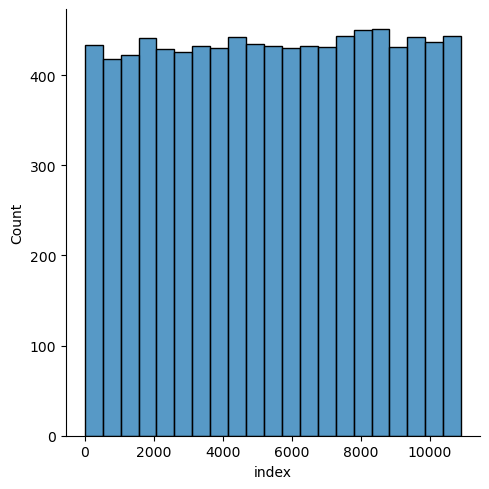

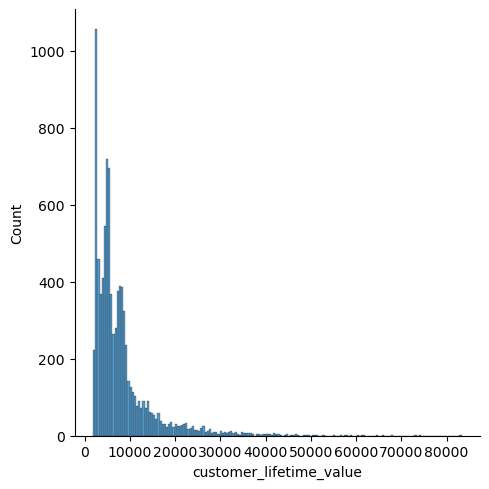

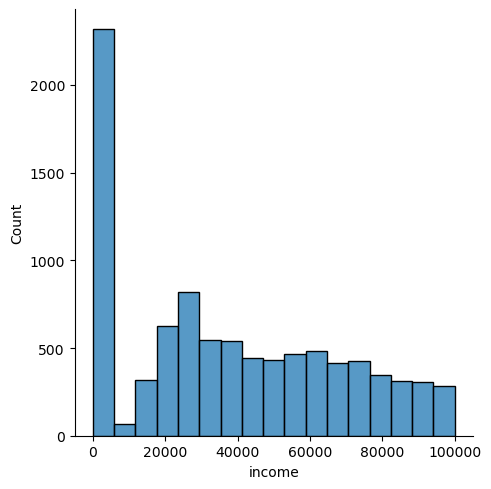

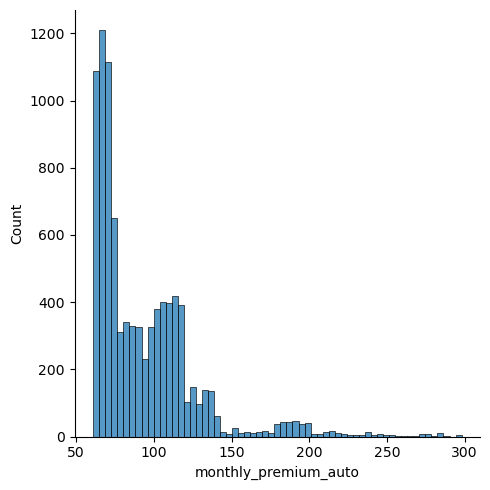

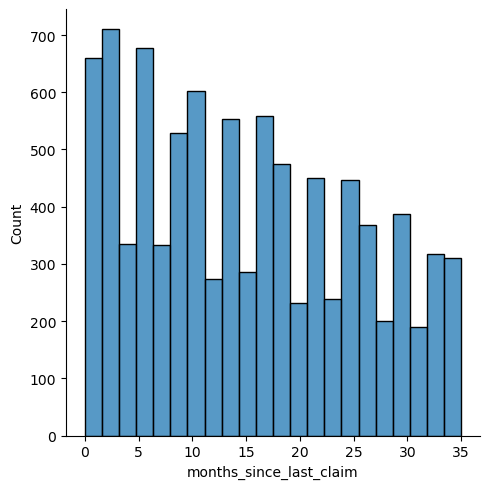

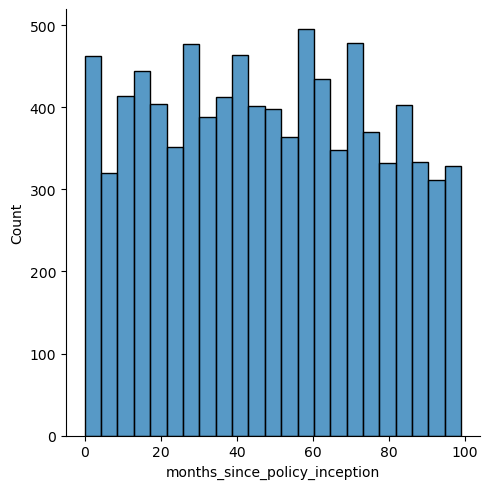

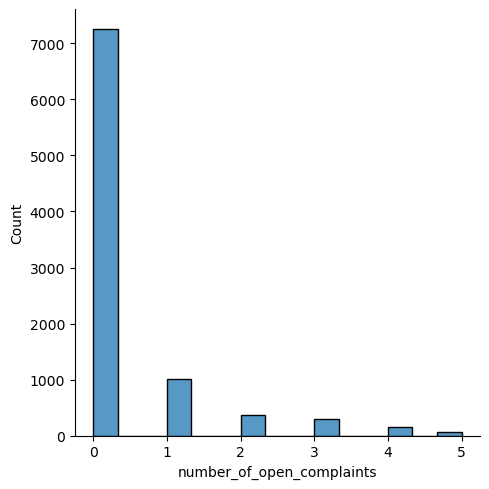

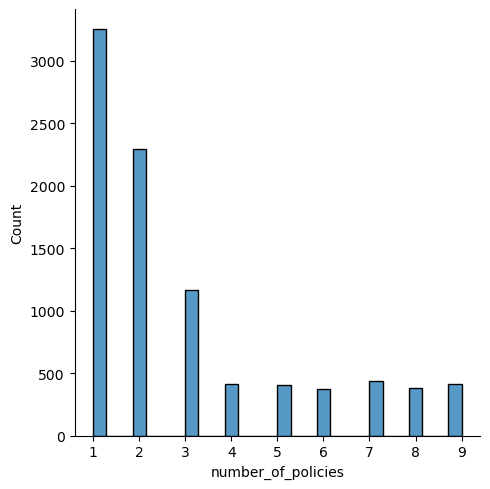

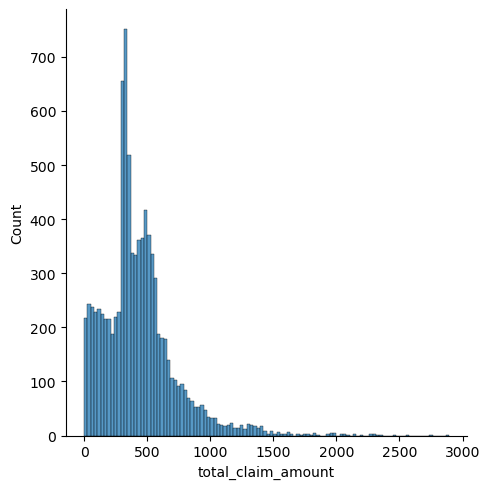

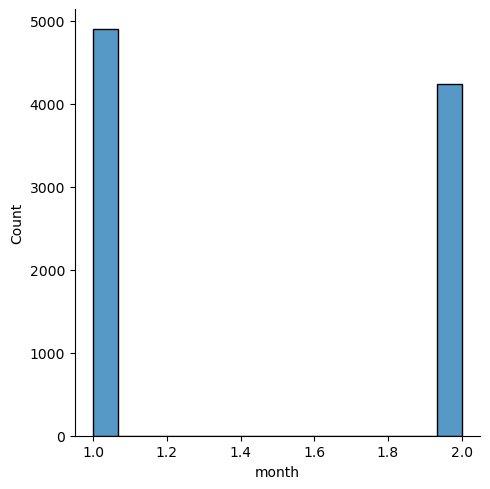

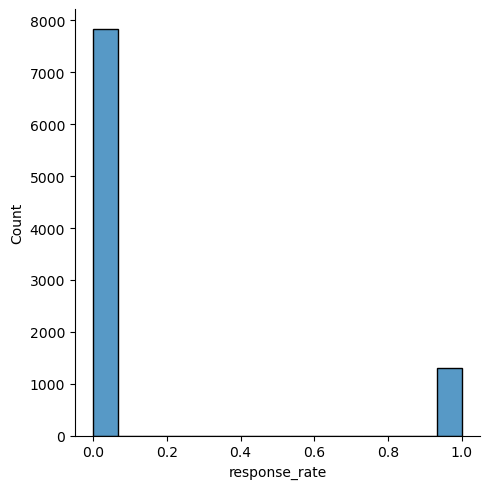

In [283]:
for column in numerical:
    sns.displot(numerical[column])

In [284]:
#check the multicollinearity between the features
multico_matrix= numerical.corr()
multico_matrix

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,response_rate
index,1.000000,-0.004350,0.010735,-0.010762,0.005453,0.015632,0.000454,0.007048,-0.009855,0.006617,-0.017350
customer_lifetime_value,-0.004350,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096,-0.008930
income,0.010735,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169,0.011932
monthly_premium_auto,-0.010762,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467,0.010966
months_since_last_claim,0.005453,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921,-0.016597
months_since_policy_inception,0.015632,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010,0.002952
number_of_open_complaints,0.000454,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335,-0.009881
number_of_policies,0.007048,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305,-0.020891
total_claim_amount,-0.009855,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820,0.016877
month,0.006617,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000,-0.034221


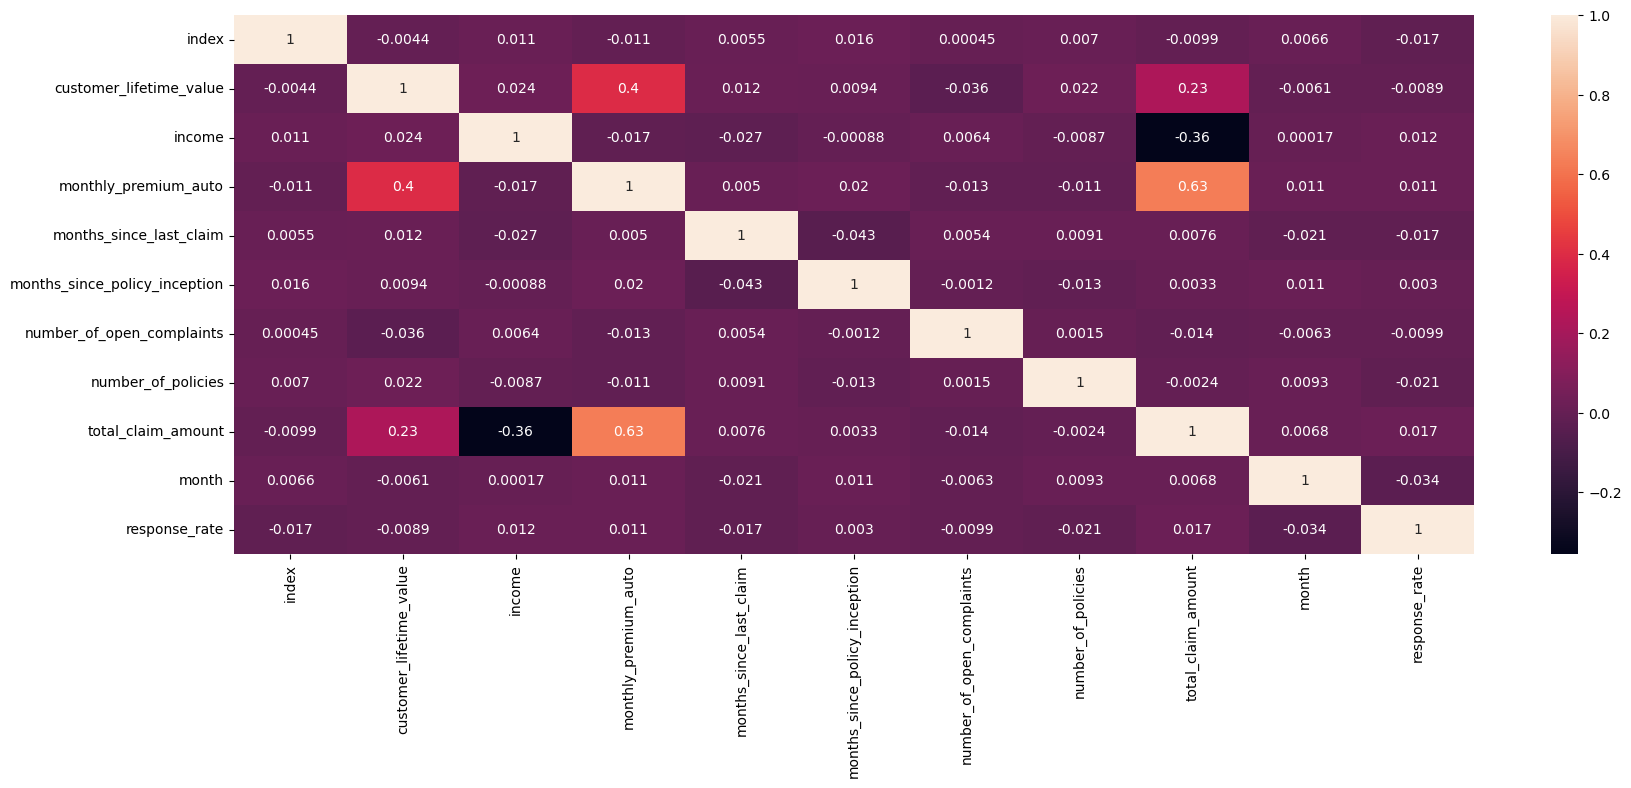

In [285]:
plt.figure(figsize = (20,7))
sns.heatmap(multico_matrix, annot=True)
plt.show()


In [286]:
#ROUND 5

#X-y split.

In [287]:
# set y to our target

y = file2['total_claim_amount']
# put the other features to x
X = file2.drop(['total_claim_amount'], axis=1)

In [288]:
X_num = X.select_dtypes(include=np.number) 
X_num
#numerical = file2.select_dtypes(include=np.number)
#numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate
0,4809.216960,48029,61,7.0,52,0.0,9,2,0
1,2228.525238,0,64,3.0,26,0.0,1,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,1,1
4,5035.035257,37405,63,8.0,99,3.0,4,2,0
...,...,...,...,...,...,...,...,...,...
9129,2771.663013,59855,74,30.0,82,4.0,1,1,0
9130,19228.463620,0,187,14.0,32,0.0,2,2,0
9131,5259.444853,61146,65,7.0,68,0.0,6,1,0
9132,23893.304100,39837,201,11.0,63,0.0,2,2,0


In [289]:
X_cat = X.select_dtypes(include=object) 
X_cat

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
9130,QI63521,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
9131,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
9132,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,M


In [334]:
#Normalize (numerical), by make data range from 0 - 1

from sklearn.preprocessing import MinMaxScaler 
#from sklearn.preprocessing import StandardScaler

transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

x_normalized= pd.DataFrame(x_normalized, columns=X_num.columns)

(9134, 9)


In [335]:
x_normalized

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9129,0.010729,0.598664,0.054852,0.857143,0.828283,0.8,0.000,0.0,0.0
9130,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,1.0,0.0
9131,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0
9132,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0


In [336]:
# scaling standard scaler: make data distributed with mean=0 and std=1
#from sklearn.preprocessing import StandardScaler
#transformer = StandardScaler().fit(numerical)
#x_num_standard = transformer.transform(numerical)
#print(x_num_standard.shape)
#X_num_standard=pd.DataFrame(x_num_standard, columns=numerical.columns)
#X_num_standard.head()

In [296]:
X_cat.drop("customer",inplace=True,axis=1)
X_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
9130,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
9131,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
9132,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,M


In [297]:
# sklearn

from sklearn.preprocessing import OneHotEncoder

#pd.DataFrame=OneHotEncoder(drop='first').fit_transform(X_cat).toarray()
#display (pd.DataFrame)
encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

#pd.DataFrame=OneHotEncoder(drop='first').fit(X_cat).get_feature_names(input_features=X_cat.columns)
#display(pd.DataFrame2)

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [298]:
#Concat DataFrames

In [299]:

X=pd.concat([x_normalized, X_cat_encode], axis=1) # concat numerical and categorical transformations
X.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate,state_California,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [300]:
#Linear Regression

In [301]:
#Train-test split.

In [302]:
from sklearn.model_selection import train_test_split 


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 100)
#x_train,x_test,y_tarin, y_test = train_test_split( x, y, test_size = 2, random_state = 0 )

In [303]:
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate,state_California,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
7706,0.039782,0.938898,0.012658,0.657143,0.060606,0.0,0.625,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
779,0.020729,0.490893,0.126582,0.400000,0.686869,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8189,0.009674,0.457627,0.033755,0.971429,0.888889,0.0,0.000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1942,0.058389,0.348926,0.097046,0.085714,0.404040,0.0,0.500,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
459,0.089204,0.917804,0.219409,0.628571,0.646465,0.0,0.250,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [304]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 53)
(1827, 53)
(7307,)
(1827,)


In [305]:
X_test.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate,state_California,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
7175,0.011335,0.000000,0.067511,0.914286,0.000000,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7255,0.176922,0.900251,0.320675,0.371429,0.030303,0.0,0.125,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2846,0.017757,0.000000,0.130802,0.314286,0.777778,0.0,0.000,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1211,0.007286,0.259699,0.016878,0.657143,0.272727,0.0,0.000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4294,0.182713,0.890469,0.329114,0.885714,0.626263,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [306]:
reg_file = pd.read_csv('csv_files/marketing_customer_analysis.csv')
reg_file.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [307]:
#APPLY LINEAR REGRESSION
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [308]:
# MODEL VALIDATION
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7691914750361585

In [309]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7851902993112344

In [310]:
y_test[:5]

7175    436.369797
7255    406.986034
2846    529.624084
1211    329.206567
4294     49.566591
Name: total_claim_amount, dtype: float64

In [311]:
predictions_test[:5]

array([494.10417604, 603.6085835 , 561.60250109, 377.75576978,
       325.57763868])

In [312]:
# Mean_squared_error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

17643.84210592356

In [313]:
# root mean squared error
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

132.83012499400712

In [314]:
y_test.mean()

439.97056863492116

In [315]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, predictions_test)
print(mae)

93.9355104170089


In [316]:
#LAB| CUSTOMER ANALYSIS ROUND 7

#For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

#Remember the previous rounds. Follow the steps as shown in previous lectures and try 
#to improve the accuracy of the model. Include both categorical columns in the exercise. 
#Some approaches you can try in this exercise:

#use the concept of multicollinearity and remove insignificant variables
#use a different method of scaling the numerical variables
#use a different ratio of train test split
#use the transformation on numerical columns which align it more towards a normal distribution

In [317]:
#Trying to use the concept of multicollinearity and to remove insignificant variables.

#check the multicollinearity between the features
multico_matrix= numerical.corr()
multico_matrix
#plt.figure(figsize = (20,7))
#sns.heatmap(multico_matrix, annot=True)
#plt.show()

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,response_rate
index,1.000000,-0.004350,0.010735,-0.010762,0.005453,0.015632,0.000454,0.007048,-0.009855,0.006617,-0.017350
customer_lifetime_value,-0.004350,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096,-0.008930
income,0.010735,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169,0.011932
monthly_premium_auto,-0.010762,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467,0.010966
months_since_last_claim,0.005453,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921,-0.016597
months_since_policy_inception,0.015632,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010,0.002952
number_of_open_complaints,0.000454,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335,-0.009881
number_of_policies,0.007048,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305,-0.020891
total_claim_amount,-0.009855,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820,0.016877
month,0.006617,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000,-0.034221


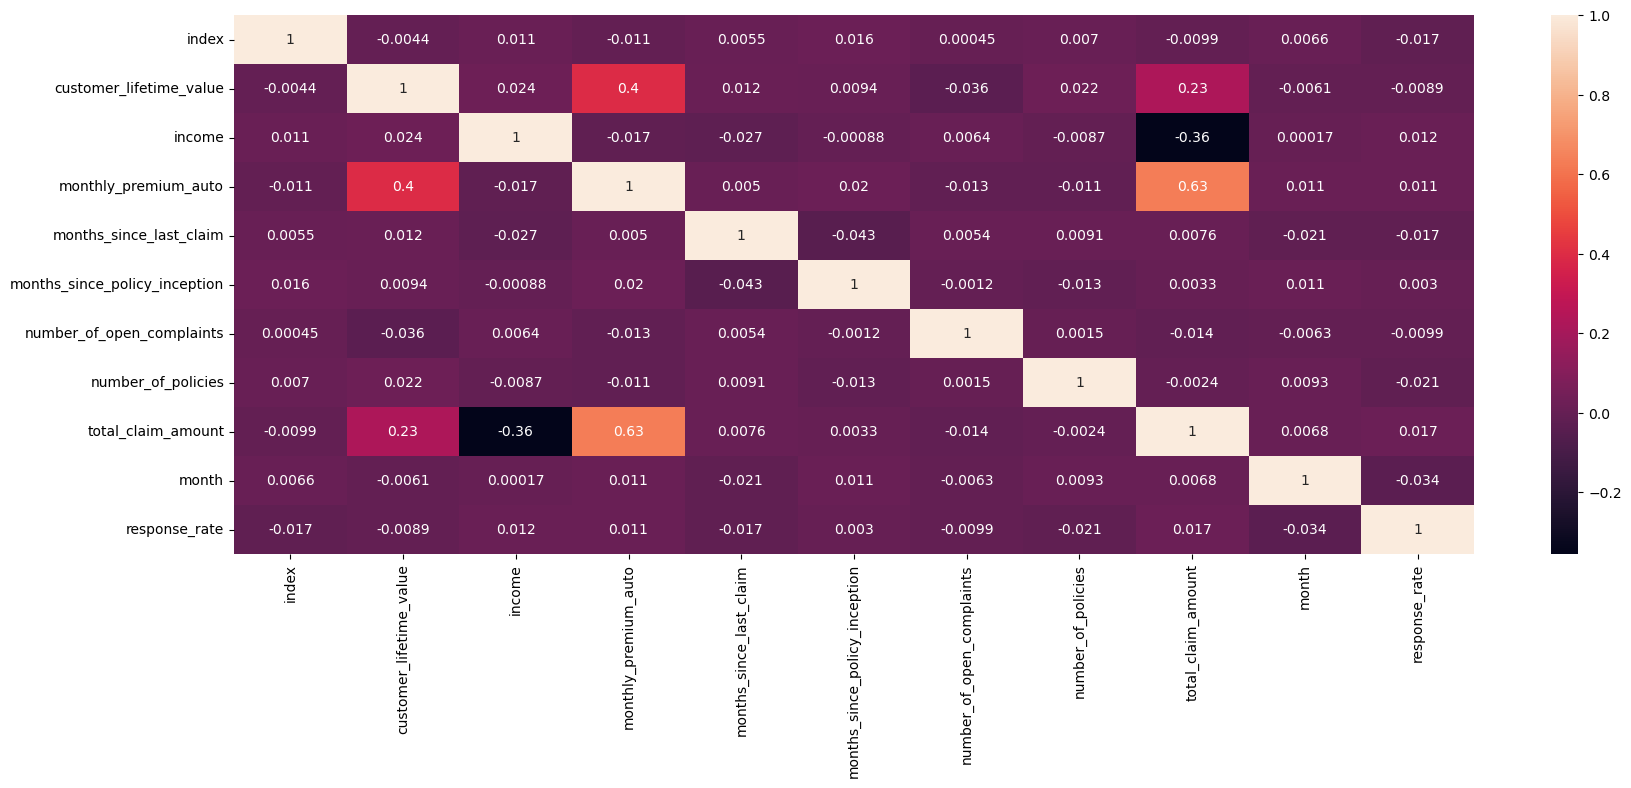

In [318]:
plt.figure(figsize = (20,7))
sns.heatmap(multico_matrix, annot=True)
plt.show()

In [319]:
#There is no strong collinearity between variables

In [320]:
#scaling the numerical variables
# Normalizing and scaling ()
# original data

#file1 = pd.read_csv('csv_files/marketing_customer_analysis.csv') 
#display(file1.head())
#file1.shape

Xn=pd.concat([x_normalized, X_cat_encode], axis=1) # concat numerical and categorical transformations
Xn.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate,state_California,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [321]:
Xn.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate,state_California,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,-0.006096,-0.008930,-0.000137,...,0.006777,-0.013499,0.177522,0.190285,0.175592,0.094543,-0.099036,0.010246,0.005708,-0.004166
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.000169,0.011932,-0.002351,...,0.012366,0.005062,0.005102,-0.009720,-0.019491,-0.017324,0.024617,0.015847,-0.003762,0.006691
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.011467,0.010966,0.005819,...,-0.010485,-0.004722,0.465811,0.499941,0.387442,0.197032,-0.241546,0.013996,-0.002812,-0.016017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.020921,-0.016597,-0.001042,...,0.014006,-0.009368,0.005106,0.002565,-0.019258,0.000585,0.008648,0.015296,-0.012090,-0.001464
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.011010,0.002952,-0.010809,...,-0.019824,0.002433,0.018329,0.013408,-0.018470,0.018596,0.002551,-0.006390,0.007047,-0.003182
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.006335,-0.009881,-0.001473,...,0.001692,-0.005230,0.004855,-0.004903,-0.012818,-0.013982,-0.002661,-0.002714,-0.002151,-0.002099
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,0.009305,-0.020891,0.000440,...,0.008203,0.011814,0.000870,-0.003839,-0.018123,0.006415,0.002694,0.006049,0.008897,-0.005835
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,1.000000,-0.034221,-0.002702,...,0.004704,-0.015264,-0.007617,0.004169,0.015513,0.005429,-0.025846,-0.000579,0.001626,-0.011913
response_rate,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,-0.034221,1.000000,0.003233,...,-0.048090,-0.029947,-0.026777,0.008122,0.024230,0.028869,-0.004693,0.015105,-0.043237,0.005978
state_California,-0.000137,-0.002351,0.005819,-0.001042,-0.010809,-0.001473,0.000440,-0.002702,0.003233,1.000000,...,-0.002151,-0.008468,-0.002110,-0.000746,0.007894,0.010370,-0.012186,0.009371,-0.010702,0.006782


In [322]:
Xn.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
monthly_premium_auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
months_since_last_claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
months_since_policy_inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0
month,9134.0,0.463762,0.498712,0.0,0.000000,0.000000,1.000000,1.0
response_rate,9134.0,0.143201,0.350297,0.0,0.000000,0.000000,0.000000,1.0
state_California,9134.0,0.344865,0.475350,0.0,0.000000,0.000000,1.000000,1.0


In [323]:
Xn = Xn[Xn.columns[Xn.isnull().mean() < 0.80]]
display(Xn)
#dataset.isnull().sum().sort_values(ascending=False)
#Trying to find null values to improve the accuracy of the linear regression

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate,state_California,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.010729,0.598664,0.054852,0.857143,0.828283,0.8,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9130,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9131,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9132,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [324]:

#Xn=pd.concat([x_normalized, X_cat_encode], axis=1) # concat numerical and categorical transformations
Xn.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate,state_California,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [342]:

# scaling standard scaler: make data distributed with mean=0 and std=1
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerical)
x_num_standard = transformer.transform(numerical)
print(x_num_standard.shape)
X_num_standard=pd.DataFrame(x_num_standard, columns=numerical.columns)
#X_num_standard.head()

(9134, 11)


In [339]:
#x_standardized

In [347]:
Xn=pd.concat([X_num_standard, X_cat_encode], axis=1) # concat numerical and categorical transformations
Xn.head()

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_M
0,-1.744072,-0.465131,0.341416,-0.936442,-0.803856,0.141031,-0.422250,2.524561,-0.486391,1.075304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-1.743754,-0.840745,-1.239617,-0.849248,-1.200968,-0.790719,-0.422250,-0.822648,1.070060,-0.929969,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-1.743437,1.010536,-0.510839,0.197079,1.876656,-0.611536,-0.422250,-0.404247,0.158051,1.075304,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-1.743119,2.085337,0.375947,0.109885,-0.506021,-1.614960,-0.422250,-0.404247,0.171867,-0.929969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.742166,-0.432263,-0.008308,-0.878312,-0.704577,1.825350,2.873245,0.432555,-0.504443,1.075304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [349]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test=train_test_split(Xn, y, test_size = 0.3, random_state = 100)
#x_train,x_test,y_tarin, y_test = train_test_split( x, y, test_size = 2, random_state = 0 )

In [352]:
#APPLY LINEAR REGRESSION
lm2 = linear_model.LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

In [353]:
# MODEL VALIDATION
from sklearn.metrics import r2_score
predictions = lm2.predict(X_train)
r2_score(y_train, predictions)

1.0